# CMSC 25300/35300 - MMML 

## HW 5

Student: Dimitrios Tanoglidis

In [1]:
#Import stuff
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Problem 1

#### (a) 

For this part we follow the standard least squares recipe...

In [32]:
# load the data matrix X
d_jest = sio.loadmat('jesterdata.mat')
X = d_jest['X']

# load the known ratings y and true ratings truey 
d_new = sio.loadmat('newuser.mat')
y = d_new['y']
true_y = d_new['truey']

# total number of joke ratings should be m=100, n=7200
m, n = X.shape

# train on ratings we know for the new user
train_indices = np.squeeze(y != -99)
num_train = np.count_nonzero(train_indices)

# test on ratings we don't know
test_indices = np.logical_not(train_indices)
num_test = m - num_train

X_data = X[train_indices, 0:20]
y_data = y[train_indices]
y_test = true_y[test_indices]
y_train_true = true_y[train_indices]

# Solve for weights
# ===================================================
# ===================================================

# Define a function that calculates weights
def weights(X_mat,y_col):
    """
    Function that calculates weights.
    
    Gets a matrix X_mat, and a target values
    column y_col
    =============================
    """
    A = np.linalg.inv(np.matmul(X_mat.T,X_mat))
    B = np.matmul(X_mat.T,y_col[:,0])
    weight = np.matmul(A,B)
    
    return weight


# calculate the weights using the above 
w_1 = weights(X_data,y_data)


# compute predictions
# Here I will compute the predictions for all the 100 movies
    
y_predict = np.zeros(100)

for i in range(100):
    x_vec = X[i,0:20]
    
    y_predict[i] = np.dot(x_vec,w_1)
    
    
# Now split the predictions to those for the training and the testing jokes
y_pred_train = y_predict[train_indices]
y_pred_test = y_predict[test_indices]

In [129]:
# Calculate the rms of the train error
summa = 0.0
for i in range(25):
    summa += (y_pred_train[i]-y_train_true[i])**2.0

rms_train = np.sqrt(summa/25.0)

print(rms_train)

[1.71872816]


The rms error on the training set is $\sim 1.72$.

Let's now display the results.

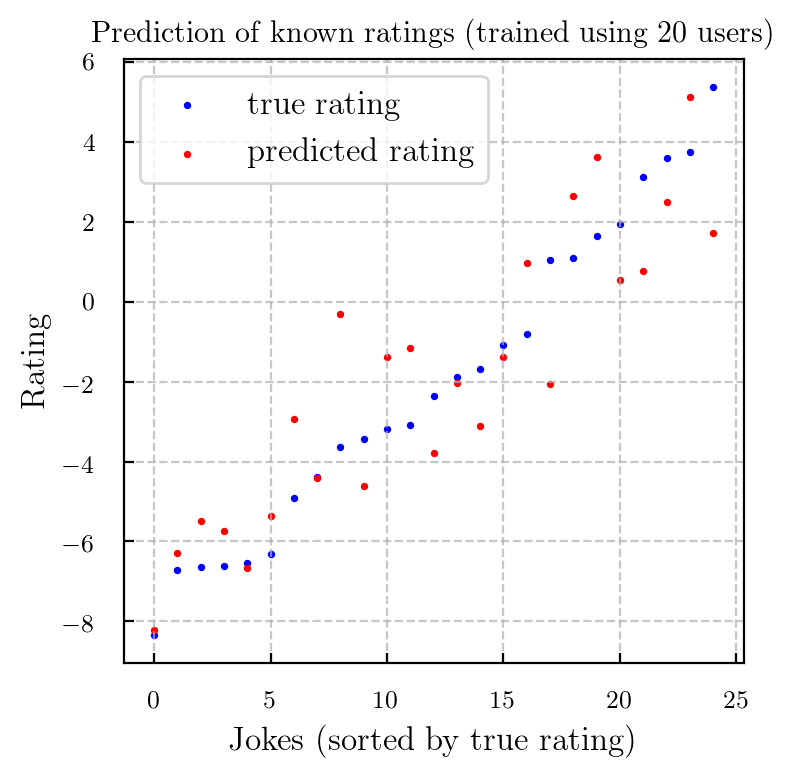

In [78]:
# display results

sort_ind_train = np.argsort(np.squeeze(y_data))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_train),y_data[sort_ind_train], color='b', s=2.7, label='true rating')
plt.scatter(range(num_train),y_pred_train[sort_ind_train], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of known ratings (trained using 20 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

In [130]:
# Measure the rms of the test error
summa = 0.0
for i in range(75):
    summa += (y_pred_test[i]-y_test[i])**2.0

rms_test = np.sqrt(summa/75.0)

print(rms_test)

[5.36190732]


Here the error is much larger, $\sim 5.36$.

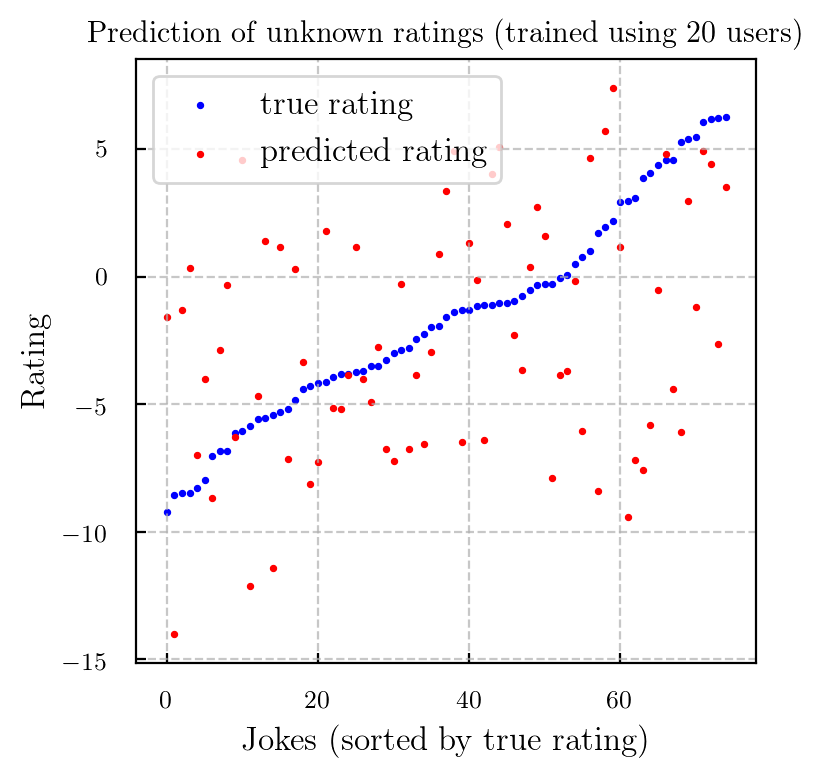

In [124]:
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),y_pred_test[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings (trained using 20 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### b) 

Now the problem is underdetermined. We have shown in class that for such problems, the optimal weights are given by:

\begin{equation}
\hat{w} = V\Sigma^{+}U^T y = X^T(XX^T)^{-1}y
\end{equation}

In [125]:
# Define a new function that calculates weights
def weights_under(X_mat,y_col):
    """
    Function that calculates weights.
    
    Gets a matrix X_mat, and a target values
    column y_col
    =============================
    """
    A = np.linalg.inv(np.matmul(X_mat,X_mat.T))
    B = np.matmul(A,y_col)
    weight = np.matmul(X_mat.T,B)
    
    return weight



# ============================================
# ============================================
X_data_full = X[train_indices]



# Calculate weights
w_2 = weights_under(X_data_full,y_data)

# Predict now
y_predict_full = np.zeros(100)

for i in range(100):
    x_vec = X[i]
    
    y_predict_full[i] = np.dot(x_vec,w_2)
    
# Predictions for the training and testing samples
y_pred_train_full = y_predict_full[train_indices]
y_pred_test_full = y_predict_full[test_indices]

In [126]:
# Calculate the rms of the train error
summa = 0.0
for i in range(25):
    summa += (y_pred_train_full[i]-y_train_true[i])**2.0

rms_train = np.sqrt(summa/25.0)

print(rms_train)

[1.82630844e-15]


The prediction error for the training sample is practically zero.

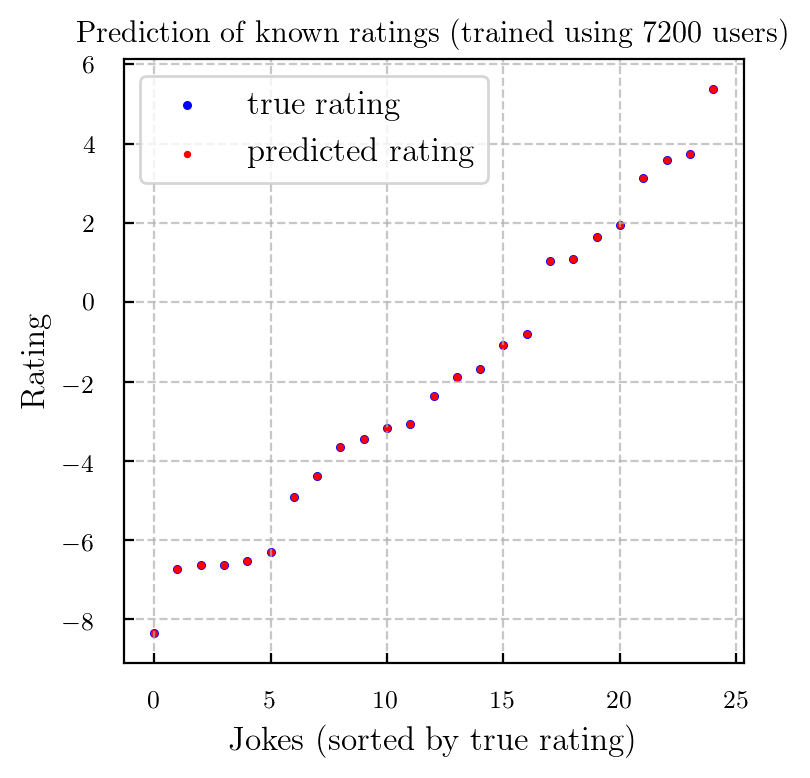

In [127]:
# display results

sort_ind_train = np.argsort(np.squeeze(y_data))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_train),y_data[sort_ind_train], color='b', s=5.0, label='true rating')
plt.scatter(range(num_train),y_pred_train_full[sort_ind_train], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of known ratings (trained using 7200 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

In [132]:
# Measure the rms of the trest error
summa = 0.0
for i in range(75):
    summa += (y_pred_test_full[i]-y_test[i])**2.0

rms_test = np.sqrt(summa/75.0)

print(rms_test)

[3.49435599]


Now error is smaller, $\sim 3.49$.

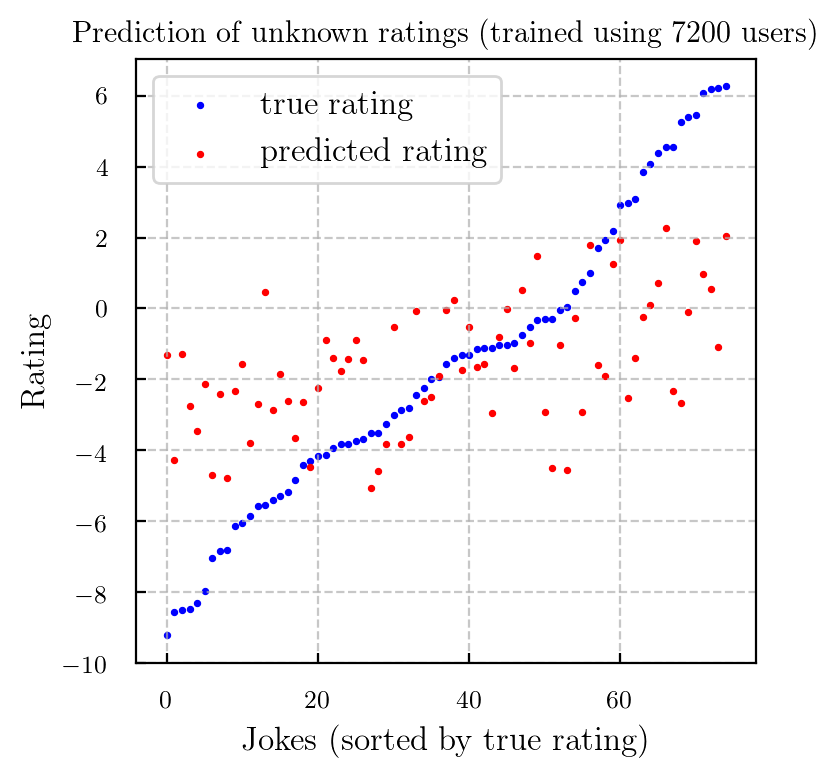

In [133]:
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (4.0,4.0))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),y_pred_test_full[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings (trained using 7200 users)")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### (c)  

Now I want to find a user that seems to give the best predictions for the new user. 

I will calculate the Euclidean distance between the vectors representing the movies rated by the new user and the same movies rated by each one of the other users:

\begin{equation}
dist = \sqrt{\sum_i (y_i - y_{new})^2}
\end{equation}


And find the users for which this distance is minimum (or second from the last).

In [161]:
dists = np.zeros(7200)

for i in range(7200):
    y_user = X[train_indices,i]
    
    dists[i] = np.sqrt(np.sum((y_user - y_data[:,0])**2.0))
    
# Find the user that has the minimum difference:
user_min_ind = np.argmin(dists)

print(user_min_ind)

588


Now our "predictions" are the ratings of this user for the "unrated" movies. Let's plot to see....

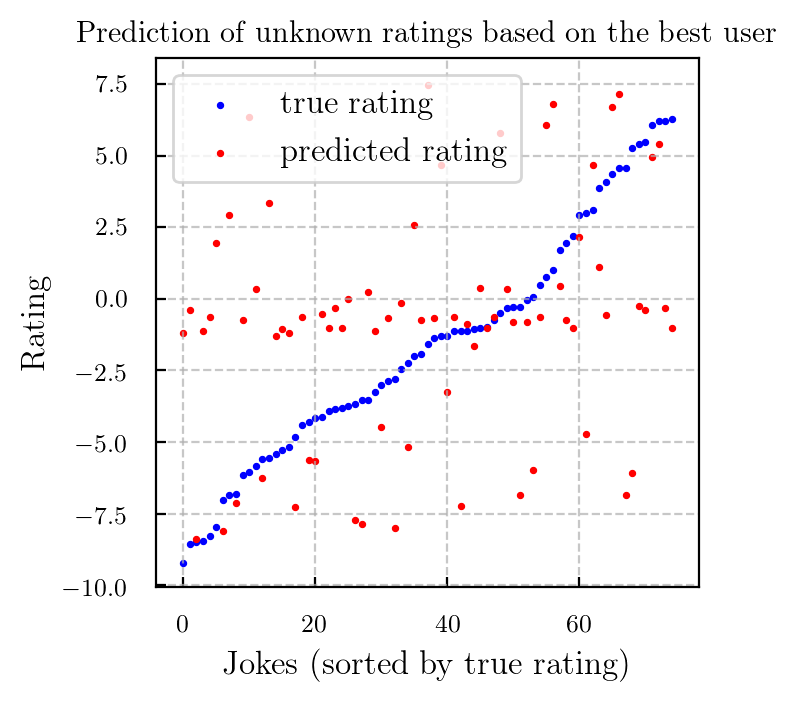

In [188]:
pred_user = X[test_indices,588]
# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (3.5,3.5))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),pred_user[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings based on the best user ")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

Now, let's find the second best matching user.

In [189]:
indxs = np.argsort(dists)
print(indxs[1])

1971


The second best user is the user number 1971. I will form my prediction now as the mean of the predictions of the two users.

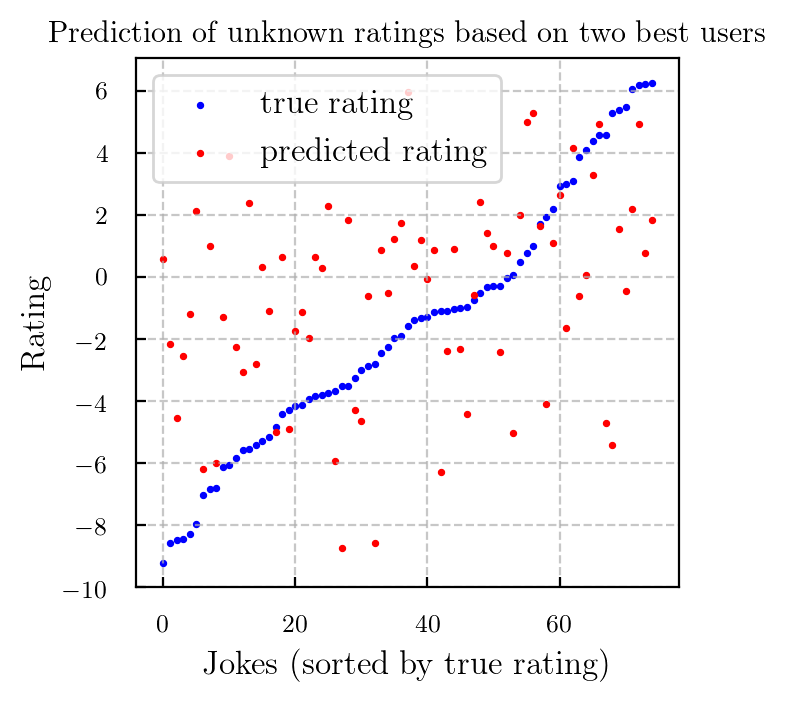

In [190]:
pred_two_best = 0.5*(X[test_indices,588]+X[test_indices,1971])

# display results

sort_ind_test = np.argsort(np.squeeze(y_test))
plt.figure(figsize = (3.5,3.5))

plt.scatter(range(num_test),y_test[sort_ind_test], color='b', s=2.7, label='true rating')
plt.scatter(range(num_test),pred_two_best[sort_ind_test], color='red', s=2.7,label='predicted rating')

plt.title("Prediction of unknown ratings based on two best users ")
plt.legend(frameon=True, loc='upper left', fontsize=12)

plt.xlabel("Jokes (sorted by true rating)", fontsize=12)
plt.ylabel("Rating", fontsize=12)

plt.grid(ls='--',alpha=0.7)
plt.show()

#### (d) 